<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 10. Home Assignment II.

---

## B) Fashion MNIST

<img src="./pics/exercises/fashion.gif" width=400>

Build a convolutional network to classify the fashion mnist dataset. Build a function which will predict the class for an image. The function will get a path of an image as a parameter, it reads the image then returns the predicted class. You can assume that the path will always contain an image, which has *28 x 28 x 4* dimensions.

The dataset is available in [keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles). An example image is available at `data/fashion/test.png`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping

from numpy.random import seed

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# set random seeds for reproducibility
tf.random.set_seed(42)
seed(42)

In [3]:
# download dataset and rescale to 0-1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.   

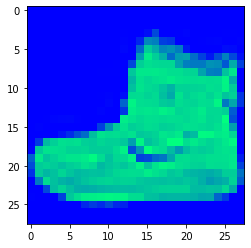

In [5]:
# sample image
plt.imshow(x_train[0], cmap=plt.get_cmap('winter'))

In [6]:
input_shape = (28, 28, 1)

print(y_train.shape)
print(input_shape)

(60000,)
(28, 28, 1)


In [7]:
# Initialize model
output_dim = 10

inp = Input(shape=input_shape)
queue = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
queue = Conv2D(filters=64, kernel_size=(4, 4), activation='relu')(queue)
queue = MaxPool2D(pool_size=(2, 2))(queue)
queue = Dropout(0.3)(queue)
queue = Flatten()(queue)
queue = Dense(units=128, activation='relu')(queue)
queue = Dropout(0.2)(queue)
queue = Dense(units=output_dim, activation='softmax')(queue)
model = Model(inputs=inp, outputs=queue)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360

In [8]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=80,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3,
                                             verbose=1, mode='min')])

Epoch 1/80
480/480 [==============================] - 191s 397ms/step - loss: 0.4879 - accuracy: 0.8227 - val_loss: 0.3411 - val_accuracy: 0.8773
Epoch 2/80
480/480 [==============================] - 286s 597ms/step - loss: 0.3207 - accuracy: 0.8831 - val_loss: 0.2826 - val_accuracy: 0.8955
Epoch 3/80
480/480 [==============================] - 233s 485ms/step - loss: 0.2695 - accuracy: 0.8999 - val_loss: 0.2529 - val_accuracy: 0.9061
Epoch 4/80
480/480 [==============================] - 131s 273ms/step - loss: 0.2357 - accuracy: 0.9128 - val_loss: 0.2495 - val_accuracy: 0.9098
Epoch 5/80
480/480 [==============================] - 126s 262ms/step - loss: 0.2107 - accuracy: 0.9206 - val_loss: 0.2279 - val_accuracy: 0.9178
Epoch 6/80
480/480 [==============================] - 120s 249ms/step - loss: 0.1857 - accuracy: 0.9308 - val_loss: 0.2216 - val_accuracy: 0.9197
Epoch 7/80
480/480 [==============================] - 121s 253ms/step - loss: 0.1704 - accuracy: 0.9355 - val_loss: 0.2250 -

In [10]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f'The model final accuracy on test set is {final_accuracy:.2%}')

313/313 [==============================] - 6s 20ms/step - loss: 0.2332 - accuracy: 0.9192
The model final accuracy on test set is 91.92%


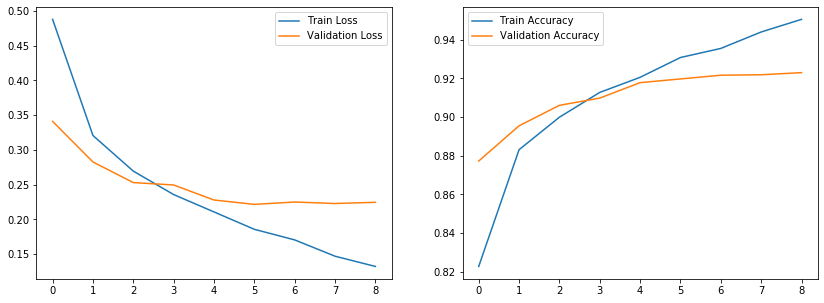

In [13]:
# visualize execution
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_fashion_cnn.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mnist_fashion_cnn.h5")
print("Saved model to disk")

Saved model to disk
